In [1]:
import shutil
import sys
import os.path

# check if pyomo has been installed. If not, install with pip
if not shutil.which("pyomo"):
    !pip install -q pyomo
assert(shutil.which("pyomo"))

# check if COIN-OR CBC is installed. If not, install.
if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc
        except:
            pass
assert(shutil.which("cbc") or os.path.isfile("cbc"))

import pyomo.environ as pyo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.1 MB/s eta 0:00:00
Selecting previously unselected package coinor-libcoinutils3v5:amd64.
(Reading database ... 120901 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.11.4+repack1-2_amd64.deb ...
Unpacking coinor-libcoinutils3v5:amd64 (2.11.4+repack1-2) ...
Selecting previously unselected package coinor-libosi1v5:amd64.
Preparing to unpack .../1-coinor-libosi1v5_0.108.6+repack1-2_amd64.deb ...
Unpacking coinor-libosi1v5:amd64 (0.108.6+repack1-2) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.17.5+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.17.5+repack1-1) ...
Selecting previously unselected package coinor-libcgl1:amd64.
Preparing to unpack .../3-coinor-libcgl1_0.60.3+repack1-3_amd64.deb ...
Unpacking coinor-libcgl1:amd64 (0.60.3+repack1-3

In [3]:
shutil.which("cbc")

'/usr/bin/cbc'

In [33]:
from pyomo.environ import ConcreteModel, Var, NonNegativeReals, Objective, maximize, minimize, Constraint
from pyomo.opt import SolverFactory
import matplotlib.pyplot as plt
import numpy as np

In [58]:
# параметры функции оптимизации Z = a*x1 + b*x2
a = 2
b = 6

# параметры системы a1*x1 + b1*x2 = n1; a2*x1 + b2*x2 = n2; a3*x1 + b3*x2 = n3;
a1 = 1
a2 = 1
a3 = 2
b1 = 1
b2 = 2
b3 = 3
n1 = 8
n2 = 7
n3 = 3

In [59]:
model = pyo.ConcreteModel()

model.x = Var(domain=NonNegativeReals)
model.y = Var(domain=NonNegativeReals)

model.profit = Objective(
    expr = a*model.x + b*model.y,
    sense = maximize)                 # maximize\minimize

model.laborA = Constraint(expr = a1 * model.x + b1 * model.y >= n1) # поменять знак в соответствии с вариантом
model.laborB = Constraint(expr = a2 * model.x + b2 * model.y >= n2) # поменять знак в соответствии с вариантом
model.laborC = Constraint(expr = a3 * model.x + b3 * model.y >= n3) # поменять знак в соответствии с вариантом

In [60]:
SolverFactory('cbc',path='/usr/bin/cbc').solve(model).write()

  - termination condition: unbounded
  - message from solver: <undefined>


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: inf
  Upper bound: None
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 2
  Number of nonzeros: 2
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: unbounded
  Termination message: Model was proven to be unbounded.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
    Black box: 
      Number of iterations: 0
 

In [61]:
print(f"Units of X = {model.x()}")
print(f"Units of Y = {model.y()}")

Units of X = None
Units of Y = None


In [56]:
# Если в предыдущем блоке у вас есть None, а в предпредыдущем
# в одном из пунктов Lower bound: или Upper bound: стоит inf, тогда
# Даже не запускаем этот блок. Он равен бесконечности
Z = a * model.x() + b * model.y()
Z

3.0

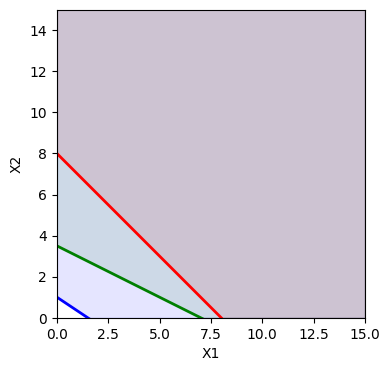

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.set_aspect('equal')
# "Размеры" графика
ax.axis([0, 15, 0, 15])
ax.set_xlabel('X1')
ax.set_ylabel('X2')

# Ниже чертятся прямые по следующему правилу:
# x2 = (n1 - a1*x1) / b1. Укажите в массиве размер х1, который вам подойдет
x1 = np.array([0, 8])
ax.plot(x1, (n1 - a1*x1) / b1, 'r', lw=2)
ax.plot(x1, (n2 - a2*x1) / b2, 'g', lw=2)
ax.plot(x1, (n3 - a3*x1) / b3, 'b', lw=2)

# Это блок заливки. Чтобы его сделать красиво - нужно подумать самому.
# Списки в аргументе функций описывают заливку от y0 до y1 с постоянным x
# [x, y0, y1] Соотнеси аргументы с графиком и все будет понятно
# Чтобы выбрать направление заливки - посмотрите на знаки уравнений в системе.
# Если >= то заливка удоляется от начала оси координат и наоборот
ax.fill_between([0, 8, 15], [8, 0,0 ], [15, 15, 15], color='r', alpha=0.10)
ax.fill_between([0, 7, 15], [3.5, 0,0 ], [15, 15, 15], color='g', alpha=0.10)
ax.fill_between([0, 1.5, 15], [1, 0,0 ], [15, 15, 15], color='b', alpha=0.10)

plt.savefig(fname='plot', bbox_inches='tight')